In [1]:
import os
import numpy as np
import pickle

from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data_file = '../data/data.sav'

with open(data_file, "rb") as f:
    X, Y = pickle.load(f)
    
X = np.asarray(X)
Y = np.asarray(Y)

split = 8000

x_train = X[:split]
y_train = Y[:split]

x_test  = X[split:]
y_test  = Y[split:]

In [3]:
inputs = Input(shape=(x_train.shape[1],))

dense = Dense(64, activation='relu')
x = dense(inputs)
x = Dense(64, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)

output_layer = Dense(y_train.shape[1], activation = 'softmax')(x)

model = Model(inputs, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 35)                4515      
Total params: 22,819
Trainable params: 22,819
Non-trainable params: 0
_______________________________________________________

In [8]:
opt = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [9]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=200
          , shuffle=True)

Epoch 1/200
8000/8000 [==============================] - 0s 57us/step - loss: 0.0019 - mae: 0.0266
Epoch 2/200
8000/8000 [==============================] - 0s 34us/step - loss: 0.0014 - mae: 0.0228
Epoch 3/200
8000/8000 [==============================] - 0s 34us/step - loss: 0.0013 - mae: 0.0215
Epoch 4/200
8000/8000 [==============================] - 0s 33us/step - loss: 0.0012 - mae: 0.0200
Epoch 5/200
8000/8000 [==============================] - 0s 33us/step - loss: 9.6488e-04 - mae: 0.0182
Epoch 6/200
8000/8000 [==============================] - 0s 34us/step - loss: 8.0850e-04 - mae: 0.0166
Epoch 7/200
8000/8000 [==============================] - 0s 35us/step - loss: 6.9692e-04 - mae: 0.0153
Epoch 8/200
8000/8000 [==============================] - 0s 36us/step - loss: 6.3205e-04 - mae: 0.0146
Epoch 9/200
8000/8000 [==============================] - 0s 34us/step - loss: 5.8040e-04 - mae: 0.0139
Epoch 10/200
8000/8000 [==============================] - 0s 35us/step - loss: 5.3687e-04

8000/8000 [==============================] - 0s 33us/step - loss: 1.4498e-04 - mae: 0.0071
Epoch 81/200
8000/8000 [==============================] - 0s 34us/step - loss: 1.4453e-04 - mae: 0.0071
Epoch 82/200
8000/8000 [==============================] - 0s 38us/step - loss: 1.4369e-04 - mae: 0.0071
Epoch 83/200
8000/8000 [==============================] - 0s 38us/step - loss: 1.4262e-04 - mae: 0.0071
Epoch 84/200
8000/8000 [==============================] - 0s 38us/step - loss: 1.4207e-04 - mae: 0.0071
Epoch 85/200
8000/8000 [==============================] - 0s 39us/step - loss: 1.3995e-04 - mae: 0.0070
Epoch 86/200
8000/8000 [==============================] - 0s 38us/step - loss: 1.4189e-04 - mae: 0.0071
Epoch 87/200
8000/8000 [==============================] - 0s 38us/step - loss: 1.4019e-04 - mae: 0.0070
Epoch 88/200
8000/8000 [==============================] - 0s 38us/step - loss: 1.3833e-04 - mae: 0.0070
Epoch 89/200
8000/8000 [==============================] - 0s 39us/step - loss

In [10]:
model.evaluate(x_test, y_test)

2000/2000 [==============================] - 0s 33us/step


[0.00011340124497655779, 0.006185340695083141]

In [11]:
preds = model.predict(x_test)

2.8741666e-05


Text(0.5, 1.0, 'NN Prediction')

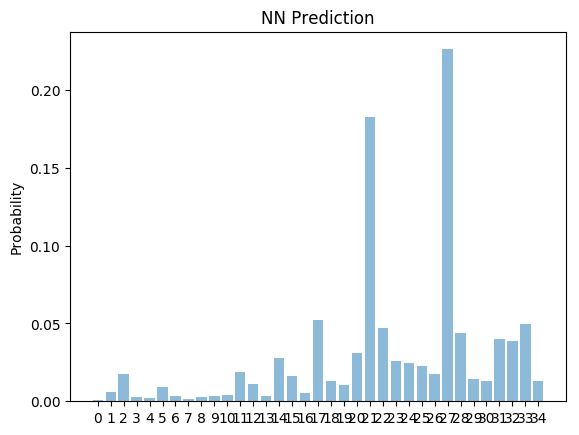

In [14]:
y_pos = np.arange(len(preds[0]))

print(np.min(preds[0]))
objects = list(range(len(preds[0])))

plt.bar(y_pos, preds[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('NN Prediction')

2.8741666e-05


Text(0.5, 1.0, 'Actual')

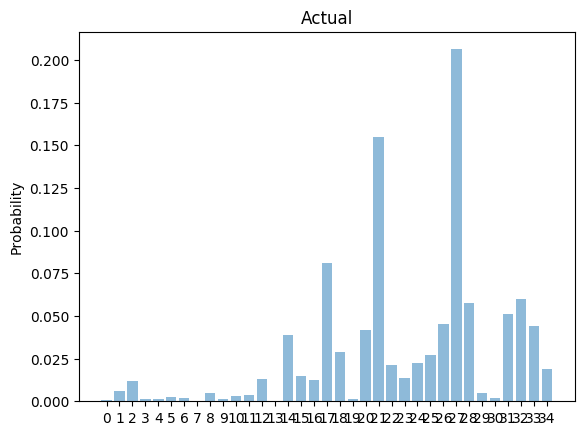

In [15]:
y_pos = np.arange(len(preds[0]))

print(np.min(preds[0]))
objects = list(range(len(preds[0])))

plt.bar(y_pos, y_test[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Actual')